In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!mv "/content/drive/MyDrive/Colab Notebooks/04_business_strategy.ipynb" banking-revenue-forecasting/notebooks

In [ ]:
!git add .
!git commit -m "Added business strategy for banking revenue and forecasting project"
!git push

## Objective

This notebook uses CLV segmentation and historical revenue data to:

- Forecast segment-level revenue
- Identify growth opportunities
- Recommend business strategies

The goal is to translate analytical insights into actionable strategies for revenue growth and customer retention.

In [5]:
import pandas as pd
import numpy as np

# If you saved clv_segmented.csv previously
# clv_data = pd.read_csv("data/clv_segmented.csv")

# Otherwise, use the dataframe from Notebook 03
# clv_data already exists with `value_segment` column

data = pd.read_csv("/content/drive/MyDrive/data-portfolio/banking-revenue-forecasting/data/banking_revenue_data.csv")
clv_data = data.groupby("customer_id").agg(
    total_revenue=("total_revenue", "sum"),
    active_months=("month", "nunique"),
    monthly_revenue=("total_revenue", "mean"),
    tenure_months=("tenure_months", "max"),
    age=("age", "first"),
    income=("income", "first"),
    credit_score=("credit_score", "first")
).reset_index()

clv_data["clv"] = clv_data["monthly_revenue"] * clv_data["active_months"]
clv_data["value_segment"] = pd.qcut(clv_data["clv"], 4, labels=["Low", "Mid", "High", "VIP"])

clv_data.head()


,customer_id,total_revenue,active_months,monthly_revenue,tenure_months,age,income,credit_score,clv,value_segment
0,1,2650.994142,36,73.638726,112,59,52187.645180,809,2650.994142,VIP
1,2,1533.274534,36,42.590959,69,72,106110.509704,695,1533.274534,Mid
2,3,2363.311933,36,65.647554,100,49,68492.775215,794,2363.311933,VIP
3,4,2318.669444,36,64.407485,90,35,81369.879241,800,2318.669444,VIP
4,5,1482.857523,36,41.190487,42,63,89353.286540,594,1482.857523,Mid


In [6]:
# Aggregate Metrics by Segment
segment_data = clv_data.groupby("value_segment").agg(
    total_clv=("clv", "sum"),
    avg_monthly_revenue=("monthly_revenue", "mean"),
    customer_count=("customer_id", "count")
).reset_index()

segment_data

/tmp/ipython-input-2827530905.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_data = clv_data.groupby("value_segment").agg(


,value_segment,total_clv,avg_monthly_revenue,customer_count
0,Low,1.257976e+06,27.955028,1250
1,Mid,1.991867e+06,44.263717,1250
2,High,2.523346e+06,56.074346,1250
3,VIP,3.294282e+06,73.206265,1250


We now have key segment-level metrics:

- **total_clv**: Total lifetime value per segment  
- **avg_monthly_revenue**: Average monthly revenue  
- **customer_count**: Number of customers per segment


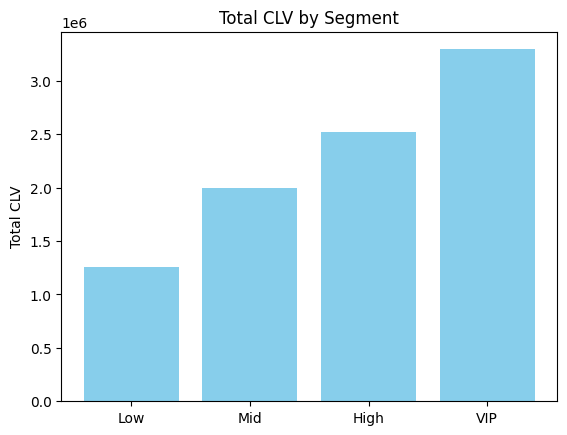

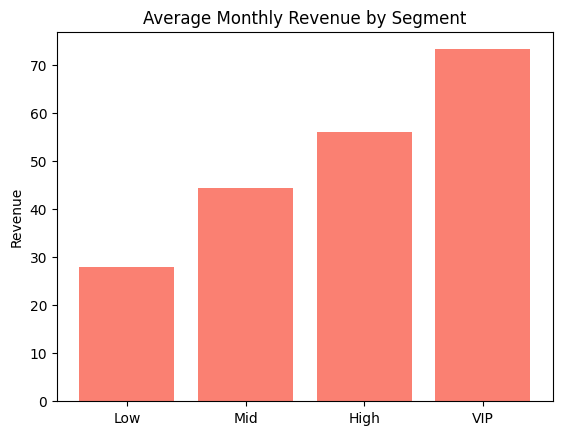

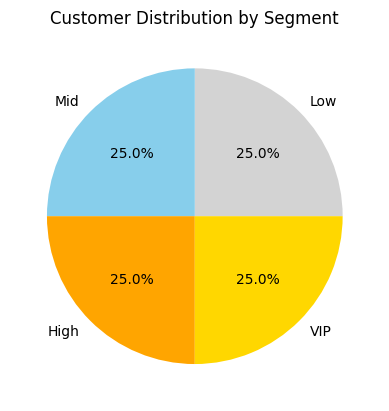

In [7]:
# Visualize Segment Metrics

import matplotlib.pyplot as plt

# Total CLV per segment
plt.bar(segment_data["value_segment"], segment_data["total_clv"], color="skyblue")
plt.title("Total CLV by Segment")
plt.ylabel("Total CLV")
plt.show()

# Average monthly revenue per segment
plt.bar(segment_data["value_segment"], segment_data["avg_monthly_revenue"], color="salmon")
plt.title("Average Monthly Revenue by Segment")
plt.ylabel("Revenue")
plt.show()

# Segment distribution (customer count)
plt.pie(segment_data["customer_count"], labels=segment_data["value_segment"], autopct='%1.1f%%', colors=['lightgrey','skyblue','orange','gold'])
plt.title("Customer Distribution by Segment")
plt.show()

In [8]:
# Placeholder: simple 6-month projection using historical avg revenue
segment_data["forecasted_revenue_next_6m"] = segment_data["avg_monthly_revenue"] * 6 * segment_data["customer_count"]

# Save for reference
segment_data.to_csv("/content/drive/MyDrive/data-portfolio/banking-revenue-forecasting/data/revenue_forecast_by_segment.csv", index=False)

segment_data[["value_segment", "forecasted_revenue_next_6m"]]


,value_segment,forecasted_revenue_next_6m
0,Low,209662.713706
1,Mid,331977.875140
2,High,420557.597114
3,VIP,549046.986803


The above projection estimates revenue for the next 6 months per segment based on average revenue per customer and segment size.


In [9]:
# Define recommended actions per segment
strategy_table = pd.DataFrame({
    "Segment": segment_data["value_segment"],
    "Recommended Action": [
        "Cost-efficient engagement, nurture to Mid",
        "Upsell/cross-sell campaigns",
        "Retention + personalized offers",
        "VIP: Priority retention & premium engagement"
    ]
})

strategy_table

,Segment,Recommended Action
0,Low,"Cost-efficient engagement, nurture to Mid"
1,Mid,Upsell/cross-sell campaigns
2,High,Retention + personalized offers
3,VIP,VIP: Priority retention & premium engagement


### Insights:

- **VIP & High segments**: Focus retention, personalized programs, and exclusive offers.  
- **Mid segment**: Upsell/cross-sell initiatives to increase CLV.  
- **Low segment**: Efficient engagement to move customers toward Mid.

## Executive Summary

- **Segment-Level Revenue Forecast:** Provides a 6-month projection to guide business planning.  
- **Key Growth Actions:** Retention, upsell, and engagement strategies tailored by segment.  
- **ROI Focus:** Allocate marketing and retention resources to maximize revenue and reduce churn.  

The system ensures data-driven strategic decisions, aligning customer value with targeted actions.
